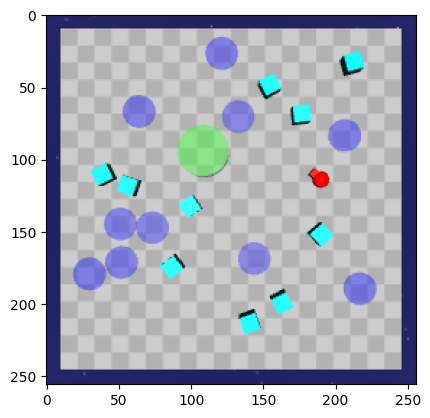

In [3]:
import gym
import safety_gym

env = gym.make('CostCont/Safexp-PointGoal2-v0')
env.num_steps = 1e10
env.reset()

import matplotlib.pyplot as plt
def render_env(env, width=256, height=256, **kwargs):
    plt.imshow(env.render(mode='rgb_array', camera_id=0,
                          width=width, height=height, **kwargs))

render_env(env)

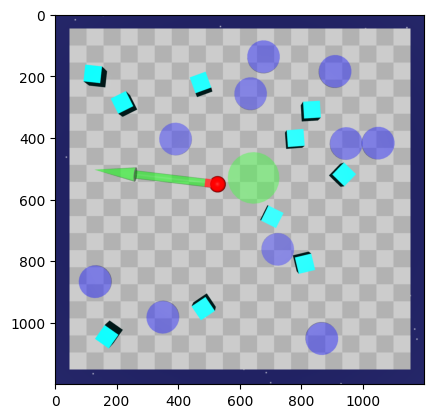

In [509]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from mujoco_py import const

width, height = 1200, 1200
env.render(mode='rgb_array')
env.step([-1, 0])

heading_kwargs = dict(
    #pos=env.world.robot_pos(),
    type=const.GEOM_ARROW,
    #type=const.GEOM_LINE,
    rgba=[0, 1, 0, 0.3],
    #rgba=[0., 1, 0., 0.4],
    size=[.05, .05, 3],
#     specular = 0.,
#     shininess = 0.,
#     reflectance=0.,
#     emission=0.,
    label=''
    #mat=env.world.robot_mat() @ R.from_euler('y', 90, degrees=True).as_matrix(),
)

# env.viewer.render(width, height, camera_id=0)
# data = env.viewer.read_pixels(width, height, depth=False)
# plt.imshow(data[::-1, :, :])
render_env(env, width, height,
           render_robot_heading=True,
           heading_kwargs=heading_kwargs)

In [4]:
from mujoco_py import const
dir(const)

['BIAS_AFFINE',
 'BIAS_MUSCLE',
 'BIAS_NONE',
 'BIAS_USER',
 'BUTTON_LEFT',
 'BUTTON_MIDDLE',
 'BUTTON_NONE',
 'BUTTON_RIGHT',
 'CAMERA_FIXED',
 'CAMERA_FREE',
 'CAMERA_TRACKING',
 'CAMERA_USER',
 'CAMLIGHT_FIXED',
 'CAMLIGHT_TARGETBODY',
 'CAMLIGHT_TARGETBODYCOM',
 'CAMLIGHT_TRACK',
 'CAMLIGHT_TRACKCOM',
 'CAT_ALL',
 'CAT_DECOR',
 'CAT_DYNAMIC',
 'CAT_STATIC',
 'CNSTRSTATE_CONE',
 'CNSTRSTATE_LINEARNEG',
 'CNSTRSTATE_LINEARPOS',
 'CNSTRSTATE_QUADRATIC',
 'CNSTRSTATE_SATISFIED',
 'CNSTR_CONTACT_ELLIPTIC',
 'CNSTR_CONTACT_FRICTIONLESS',
 'CNSTR_CONTACT_PYRAMIDAL',
 'CNSTR_EQUALITY',
 'CNSTR_FRICTION_DOF',
 'CNSTR_FRICTION_TENDON',
 'CNSTR_LIMIT_JOINT',
 'CNSTR_LIMIT_TENDON',
 'COL_ALL',
 'COL_DYNAMIC',
 'COL_PAIR',
 'CONE_ELLIPTIC',
 'CONE_PYRAMIDAL',
 'DATATYPE_AXIS',
 'DATATYPE_POSITIVE',
 'DATATYPE_QUATERNION',
 'DATATYPE_REAL',
 'DSBL_ACTUATION',
 'DSBL_CLAMPCTRL',
 'DSBL_CONSTRAINT',
 'DSBL_CONTACT',
 'DSBL_EQUALITY',
 'DSBL_FILTERPARENT',
 'DSBL_FRICTIONLOSS',
 'DSBL_GRAVITY',
 'D

In [33]:
from mujoco_py import const
import numpy as np
# https://mujoco.readthedocs.io/en/stable/APIreference.html#mjvgeom
heading_kwargs = dict(
    #pos=env.world.robot_pos(),
    type=const.GEOM_ARROW,
    #type=const.GEOM_LINE,
    rgba=[0.5, 0.5, 1, .3],
    size=np.array([.05, .05, 20]),
    specular = 0.,
    shininess = 0.,
    reflectance=0.,
    emission=0.,
    #mat=env.world.robot_mat() @ R.from_euler('y', 90, degrees=True).as_matrix(),
)

In [4]:
import time
import numpy as np
import gym
import safety_gym

def create_keyboard_listener():
    # List of used keys by MuJoCo viewer
    #    https://github.com/openai/mujoco-py/blob/master/mujoco_py/mjviewer.py#L300
    from pynput import keyboard
    def on_press(key):
        #print(f'{key} pressed {key.char}')
        try:
            if key.char == '/':
                action[0] = 1.0
            if key.char == '8':
                action[0] = -1.0
            if key.char == '9':
                action[1] = 1.0
            if key.char == '7':
                action[1] = -1.0
        except AttributeError:
            #print(f'special key {key} pressed')
            pass

    def on_release(key):
        if key == keyboard.Key.esc:
            print(f'Stopped listener')
            return False
        try:
            if key.char == '/' or key.char == '8':
                action[0] = 0.0
            if key.char == '9' or key.char == '7':
                action[1] = 0.0
        except AttributeError:
            pass

    # Collect events until releaseds
    listener = keyboard.Listener(on_press=on_press, on_release=on_release)
    listener.start()
    #print('Test', listener)
    return listener

listener = create_keyboard_listener()

#env = gym.make('CostCont/Safexp-PointGoal2-v0')
env = gym.make('CostCont/Safexp-DoggoPush2-v0')
env.floor_display_mode = True
env.num_steps = 1e10
env.reset()
print(f'Action space: {env.action_space}')

action = np.zeros(env.action_space.shape)
rewards = []
while True:
    try:
        obs, reward, done, info = env.step(action)
        rewards.append(reward)
        
        env.render(mode='human', render_robot_heading=True)
    except KeyboardInterrupt as e:
        print('Stopped simulation')
        listener.stop()
        break

Action space: Box(12,)
Creating window glfw
Stopped simulation
